# Regression Tasks
- $x \sin x$
- Medical Cost
- Concrete Compressive Strength
- California Housing

In [ ]:
from sklearn.metrics import r2_score
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

def lambda_score(f_preds, g_preds):
    """
    Computes λ(f, g) = R²(f(x), g(x)), i.e., how well g mimics f.

    Parameters:
    - f_preds: predictions from the neural network (f(x))
    - g_preds: predictions from the mimic linear model (g(x))

    Returns:
    - λ score (float)
    """
    return r2_score(f_preds, g_preds)

## $ x \sin x + ε $
$ ε \sim \mathcal{N}(0, \sigma^2) $

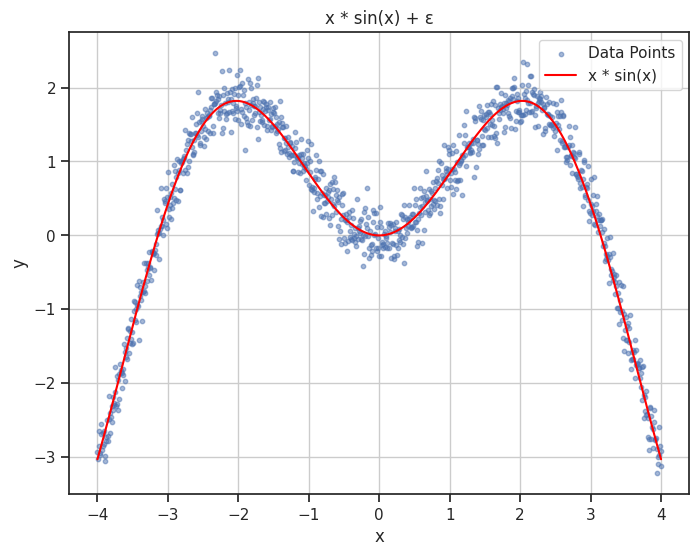

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# --- Generate x * sin(x) dataset ---
np.random.seed(42)
X = np.linspace(-4, 4, 1000).reshape(-1, 1)
y = X.flatten() * np.sin(X.flatten()) + np.random.normal(0, 0.2, X.shape[0])

# --- Plot the data ---
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(X, y, s=10, alpha=0.5, label='Data Points')  # Scatter plot of data
plt.plot(X, X.flatten() * np.sin(X.flatten()), color='red', label='x * sin(x)')  # Plot the original function
plt.title('x * sin(x) + ε')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

1. Baseline Linear Regression
  RMSE: 1.2768
  R^2:  -0.0080



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2. Neural Network
  RMSE: 0.2026
  R^2:  0.9746

3. Mimic Linear Model (g ≈ f)
  RMSE (vs f): 1.2733
  λ(f, g) = R^2(f_test, g_test): -0.0102
  R^2 (g vs y): -0.0140



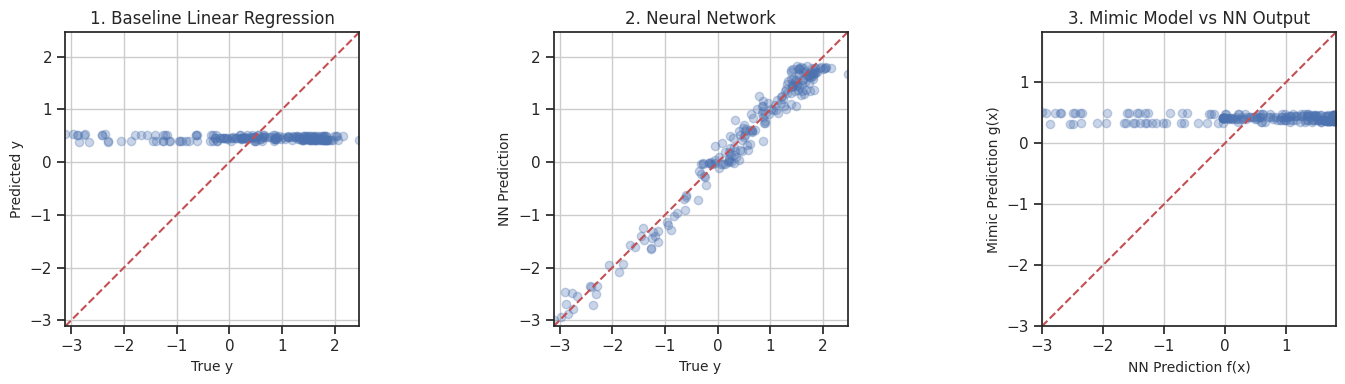

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Standardize features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 1. Baseline Linear Regression ===
baseline_lr = LinearRegression()
baseline_lr.fit(X_train_scaled, y_train)
y_pred_lr = baseline_lr.predict(X_test_scaled)

print("1. Baseline Linear Regression")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")
print(f"  R^2:  {r2_score(y_test, y_pred_lr):.4f}\n")

# === 2. Train Neural Network f(x) ===
input_dim = X_train_scaled.shape[1]
nn_model = Sequential([
    Dense(64, activation="relu", input_shape=(input_dim,)),
    Dense(64, activation="relu"),
    Dense(1, activation="linear")
])
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

f_train = nn_model.predict(X_train_scaled).flatten()
nn_preds_test = nn_model.predict(X_test_scaled).flatten()

print("2. Neural Network")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, nn_preds_test)):.4f}")
print(f"  R^2:  {r2_score(y_test, nn_preds_test):.4f}\n")

# === 3. Mimic Linear Regression g(x) ~ f(x) ===
mimic_lr = LinearRegression()
mimic_lr.fit(X_train_scaled, f_train)
g_test = mimic_lr.predict(X_test_scaled)

print("3. Mimic Linear Model (g ≈ f)")
print(f"  RMSE (vs f): {np.sqrt(mean_squared_error(nn_preds_test, g_test)):.4f}")
print(f"  λ(f, g) = R^2(f_test, g_test): {r2_score(nn_preds_test, g_test):.4f}")
print(f"  R^2 (g vs y): {r2_score(y_test, g_test):.4f}\n")

import matplotlib.pyplot as plt
import numpy as np

# === Clean, styled plotting ===
def add_styled_subplot(ax, x, y, title, xlabel, ylabel):
    ax.scatter(x, y, alpha=0.3)
    min_val = min(np.min(x), np.min(y))
    max_val = max(np.max(x), np.max(y))
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label="Ideal Fit")
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.grid(True)

# === Main Plot ===
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

add_styled_subplot(axs[0], y_test, y_pred_lr, "1. Baseline Linear Regression", "True y", "Predicted y")
add_styled_subplot(axs[1], y_test, nn_preds_test, "2. Neural Network", "True y", "NN Prediction")
add_styled_subplot(axs[2], nn_preds_test, g_test, "3. Mimic Model vs NN Output", "NN Prediction f(x)", "Mimic Prediction g(x)")

plt.tight_layout()
plt.show()

## Medical Insurance Costs

<ipython-input-4-99648cde40bd>:18: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


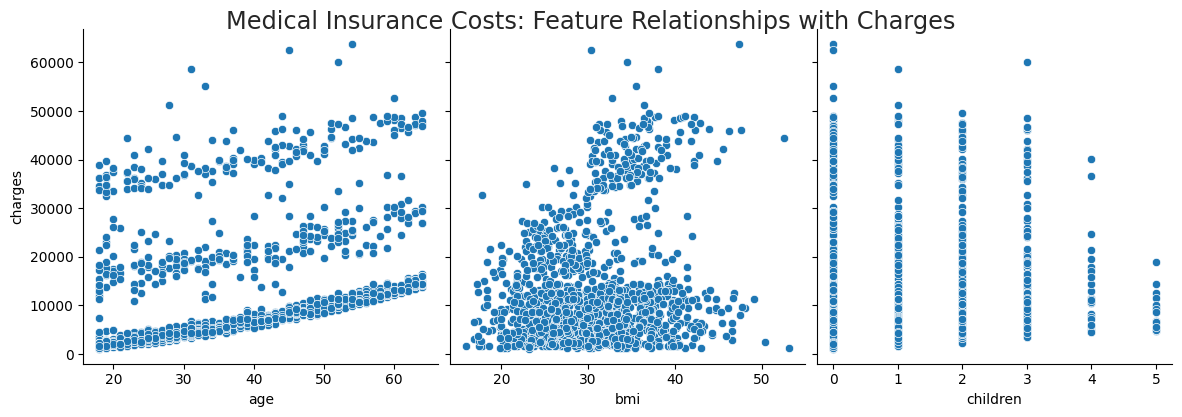

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Set the path to the file you'd like to load
file_path = "insurance.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mirichoi0218/insurance",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=4, aspect=1, kind='scatter')
sns.set(style="whitegrid", font_scale=1.2)
plt.suptitle('Medical Insurance Costs: Feature Relationships with Charges', y=1.02)
plt.show()

In [ ]:
X = df.drop('charges', axis=1)  # Features
y = df['charges']               # Target variable

# 3. Identify categorical and numerical columns
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# 4. Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# 5. Full pipeline: Preprocessing only
X_processed = preprocessor.fit_transform(X)

# 6. Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# === Model 1: Baseline Linear Regression ===
baseline_lr = LinearRegression()
baseline_lr.fit(X_train, y_train)
baseline_preds = baseline_lr.predict(X_test)

# === Model 2: Neural Network ===
nn = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1)
])
nn.compile(optimizer=Adam(learning_rate=0.01), loss="mse")
nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)

nn_preds_train = nn.predict(X_train).flatten()
nn_preds_test = nn.predict(X_test).flatten()

# === Model 3: Linear Regression trained to mimic NN ===
mimic_lr = LinearRegression()
mimic_lr.fit(X_train, nn_preds_train)
mimic_preds = mimic_lr.predict(X_test)

# === Evaluation Function ===
def evaluate(y_true, y_pred, name):
    print(f"{name}")
    print(f"  R²:   {r2_score(y_true, y_pred):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print()

evaluate(y_test, baseline_preds, "1. Baseline Linear Regression")
evaluate(y_test, nn_preds_test, "2. Neural Network")
evaluate(mimic_preds, y_test, "3. Linear Regression mimicking NN")
print(f"  λ(f) = {lambda_score(nn_preds_test, mimic_preds)}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1. Baseline Linear Regression
  R²:   0.7554
  RMSE: 6090.49

2. Neural Network
  R²:   0.8438
  RMSE: 4867.67

3. Linear Regression mimicking NN
  R²:   0.6897
  RMSE: 6115.43

  λ(f) = 0.9342020471833954


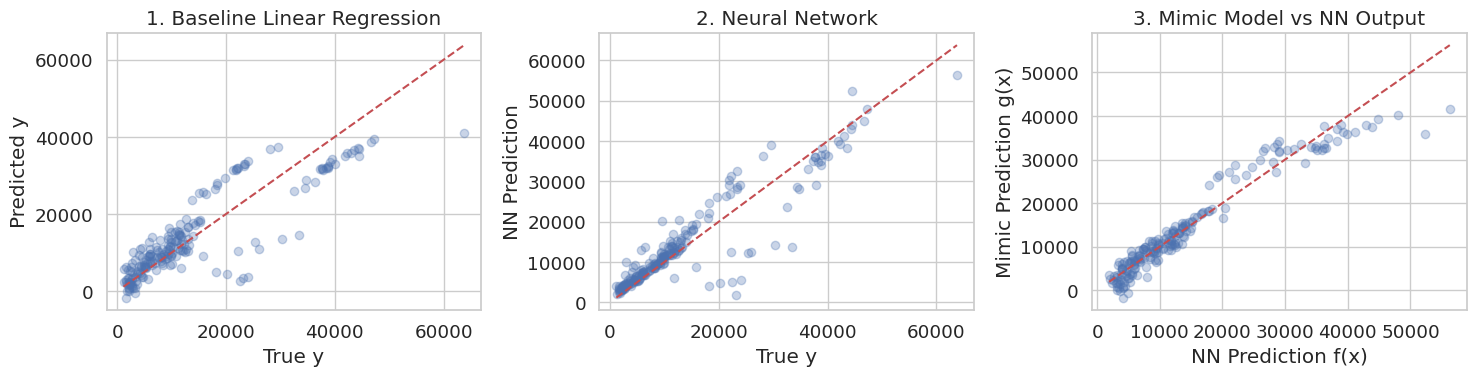

In [ ]:
# === Plotting ===
plt.figure(figsize=(15, 4))

# 1. Baseline Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, baseline_preds, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("1. Baseline Linear Regression")
plt.xlabel("True y")
plt.ylabel("Predicted y")

# 2. Neural Network
plt.subplot(1, 3, 2)
plt.scatter(y_test, nn_preds_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("2. Neural Network")
plt.xlabel("True y")
plt.ylabel("NN Prediction")

# 3. Mimic Model vs NN Output
plt.subplot(1, 3, 3)
plt.scatter(nn_preds_test, mimic_preds, alpha=0.3)
plt.plot([nn_preds_test.min(), nn_preds_test.max()], [nn_preds_test.min(), nn_preds_test.max()], 'r--')
plt.title("3. Mimic Model vs NN Output")
plt.xlabel("NN Prediction f(x)")
plt.ylabel("Mimic Prediction g(x)")

plt.tight_layout()
plt.show()

## Concrete Compressive Strength

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# metadata
print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables)


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

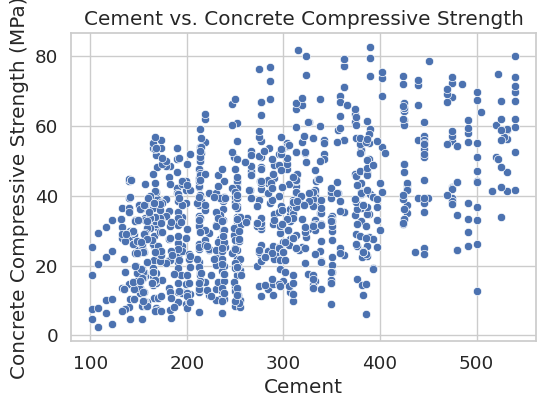

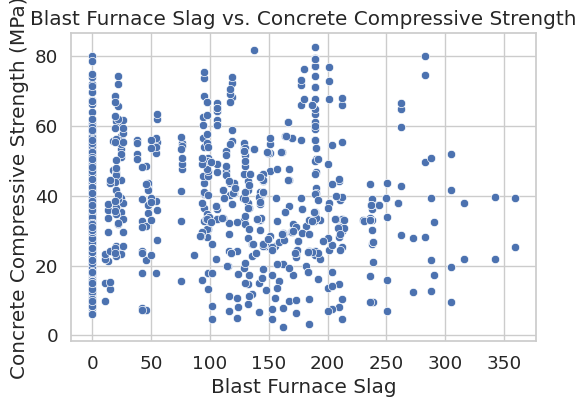

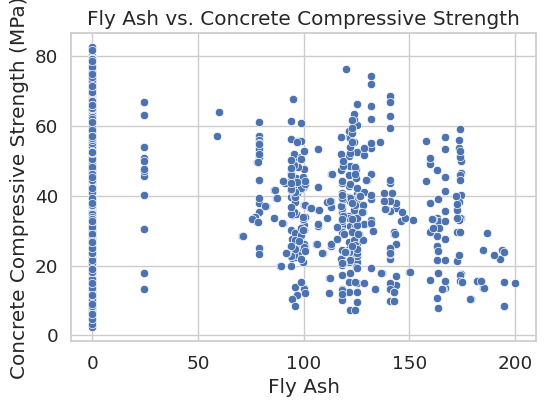

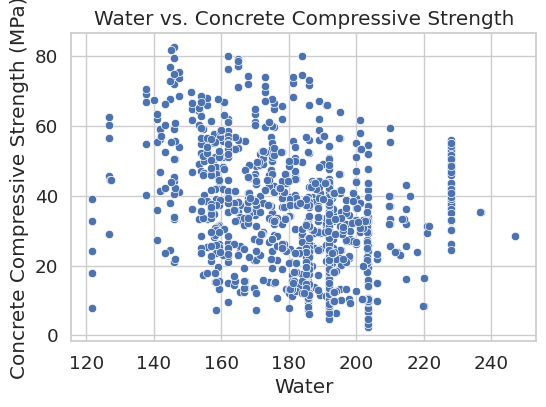

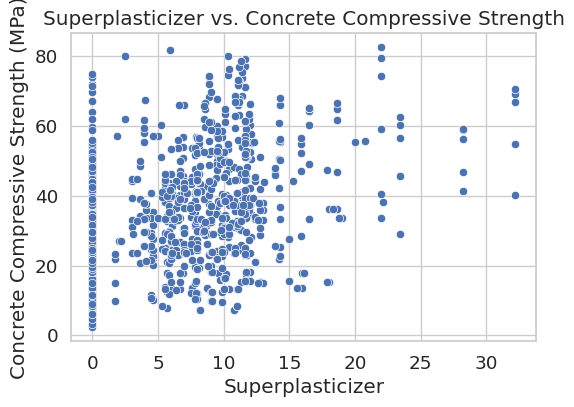

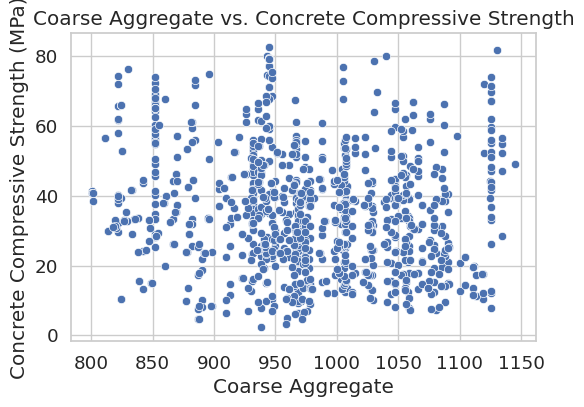

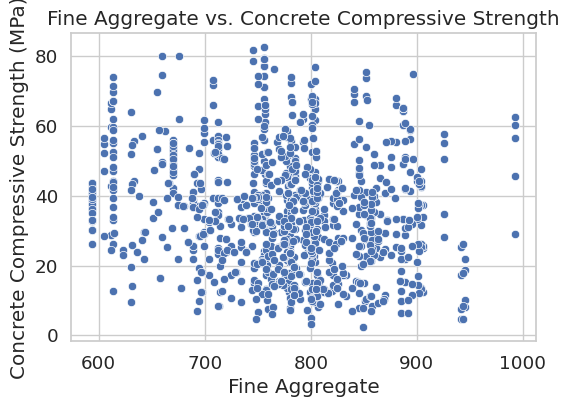

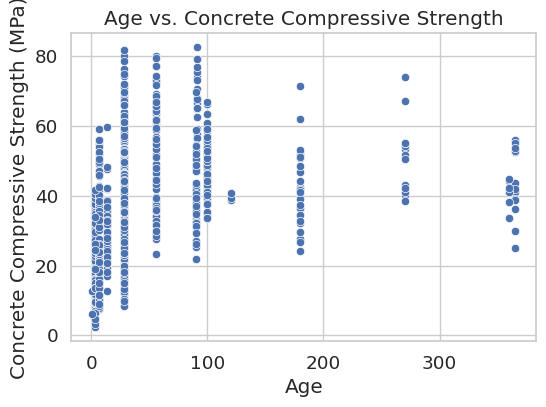

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X and y are already defined
# If not, uncomment and run the following lines:
# !pip install ucimlrepo
# from ucimlrepo import fetch_ucirepo
# concrete_compressive_strength = fetch_ucirepo(id=165)
# X = concrete_compressive_strength.data.features
# y = concrete_compressive_strength.data.targets

# Convert X to DataFrame for easier plotting with seaborn
X_df = pd.DataFrame(X, columns=concrete_compressive_strength.variables.name[concrete_compressive_strength.variables.role=='Feature'])

# Get the correct column name for the target variable
target_column_name = concrete_compressive_strength.variables.name[concrete_compressive_strength.variables.role=='Target'].iloc[0]

# Plotting relationships with target variable
for idx, feature in enumerate(X_df.columns):
    plt.figure(figsize=(6, 4))  # Adjust size as needed
    # Use the correct target column name here
    sns.scatterplot(x=X_df[feature], y=y[target_column_name])
    plt.title(f'{feature} vs. Concrete Compressive Strength')
    plt.xlabel(feature)
    plt.ylabel('Concrete Compressive Strength (MPa)')
    plt.savefig(f'concrete_{idx}.png')
    plt.show()

In [ ]:
from tensorflow.keras.layers import Dropout

# Preprocess: scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# === Model 1: Baseline Linear Regression ===
baseline_lr = LinearRegression()
baseline_lr.fit(X_train, y_train)
baseline_preds = baseline_lr.predict(X_test)

# === Model 2: Neural Network ===

nn = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.1),  # Helps with generalization
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(32, activation="relu"),
    Dense(1)
])

nn.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=0)

nn_preds_train = nn.predict(X_train).flatten()
nn_preds_test = nn.predict(X_test).flatten()

# === Model 3: Linear Regression trained to mimic NN ===
mimic_lr = LinearRegression()
mimic_lr.fit(X_train, nn_preds_train)
mimic_preds = mimic_lr.predict(X_test)

# === Evaluation Function ===
def evaluate(y_true, y_pred, name):
    print(f"{name}")
    print(f"  R²:   {r2_score(y_true, y_pred):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print()

evaluate(y_test, baseline_preds, "1. Baseline Linear Regression")
evaluate(y_test, nn_preds_test, "2. Neural Network")
evaluate(y_test, mimic_preds, "3. Linear Regression mimicking NN")
print(f"   lambda(f): {r2_score(nn_preds_test, mimic_preds)}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1. Baseline Linear Regression
  R²:   0.6041
  RMSE: 9.95

2. Neural Network
  R²:   0.8501
  RMSE: 6.13

3. Linear Regression mimicking NN
  R²:   0.5807
  RMSE: 10.24

   lambda(f): 0.6366318231215715


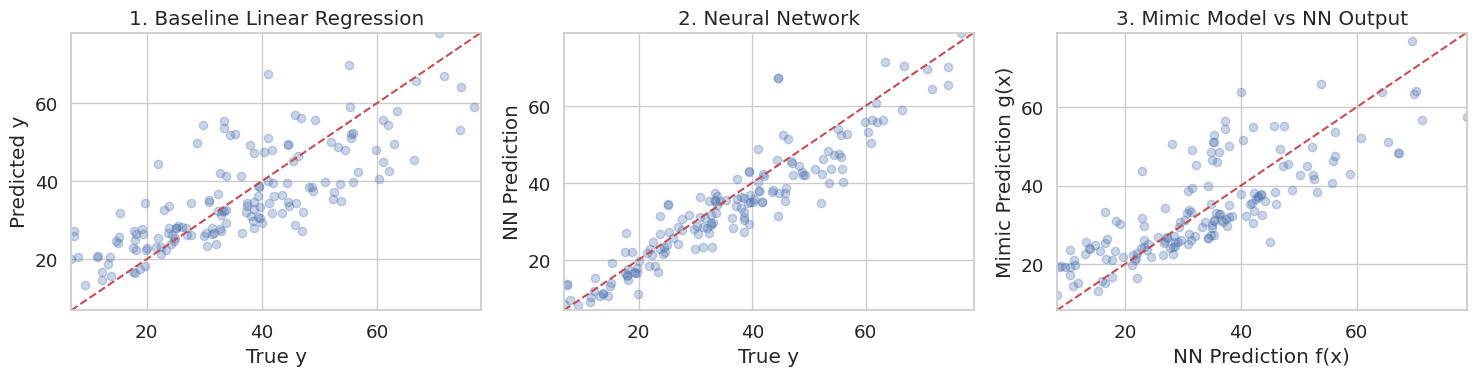

In [ ]:
# Function to add a subplot in consistent style
def add_subplot(ax, x, y, title, xlabel, ylabel):
    ax.scatter(x, y, alpha=0.3)
    min_val = min(np.min(x), np.min(y))
    max_val = max(np.max(x), np.max(y))
    ax.plot([min_val, max_val], [min_val, max_val], 'r--')
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Create the figure with three subplots
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
add_subplot(plt.gca(), y_test, baseline_preds, "1. Baseline Linear Regression", "True y", "Predicted y")

plt.subplot(1, 3, 2)
add_subplot(plt.gca(), y_test, nn_preds_test, "2. Neural Network", "True y", "NN Prediction")

plt.subplot(1, 3, 3)
add_subplot(plt.gca(), nn_preds_test, mimic_preds, "3. Mimic Model vs NN Output", "NN Prediction f(x)", "Mimic Prediction g(x)")

plt.tight_layout()
plt.show()

## California Housing Dataset

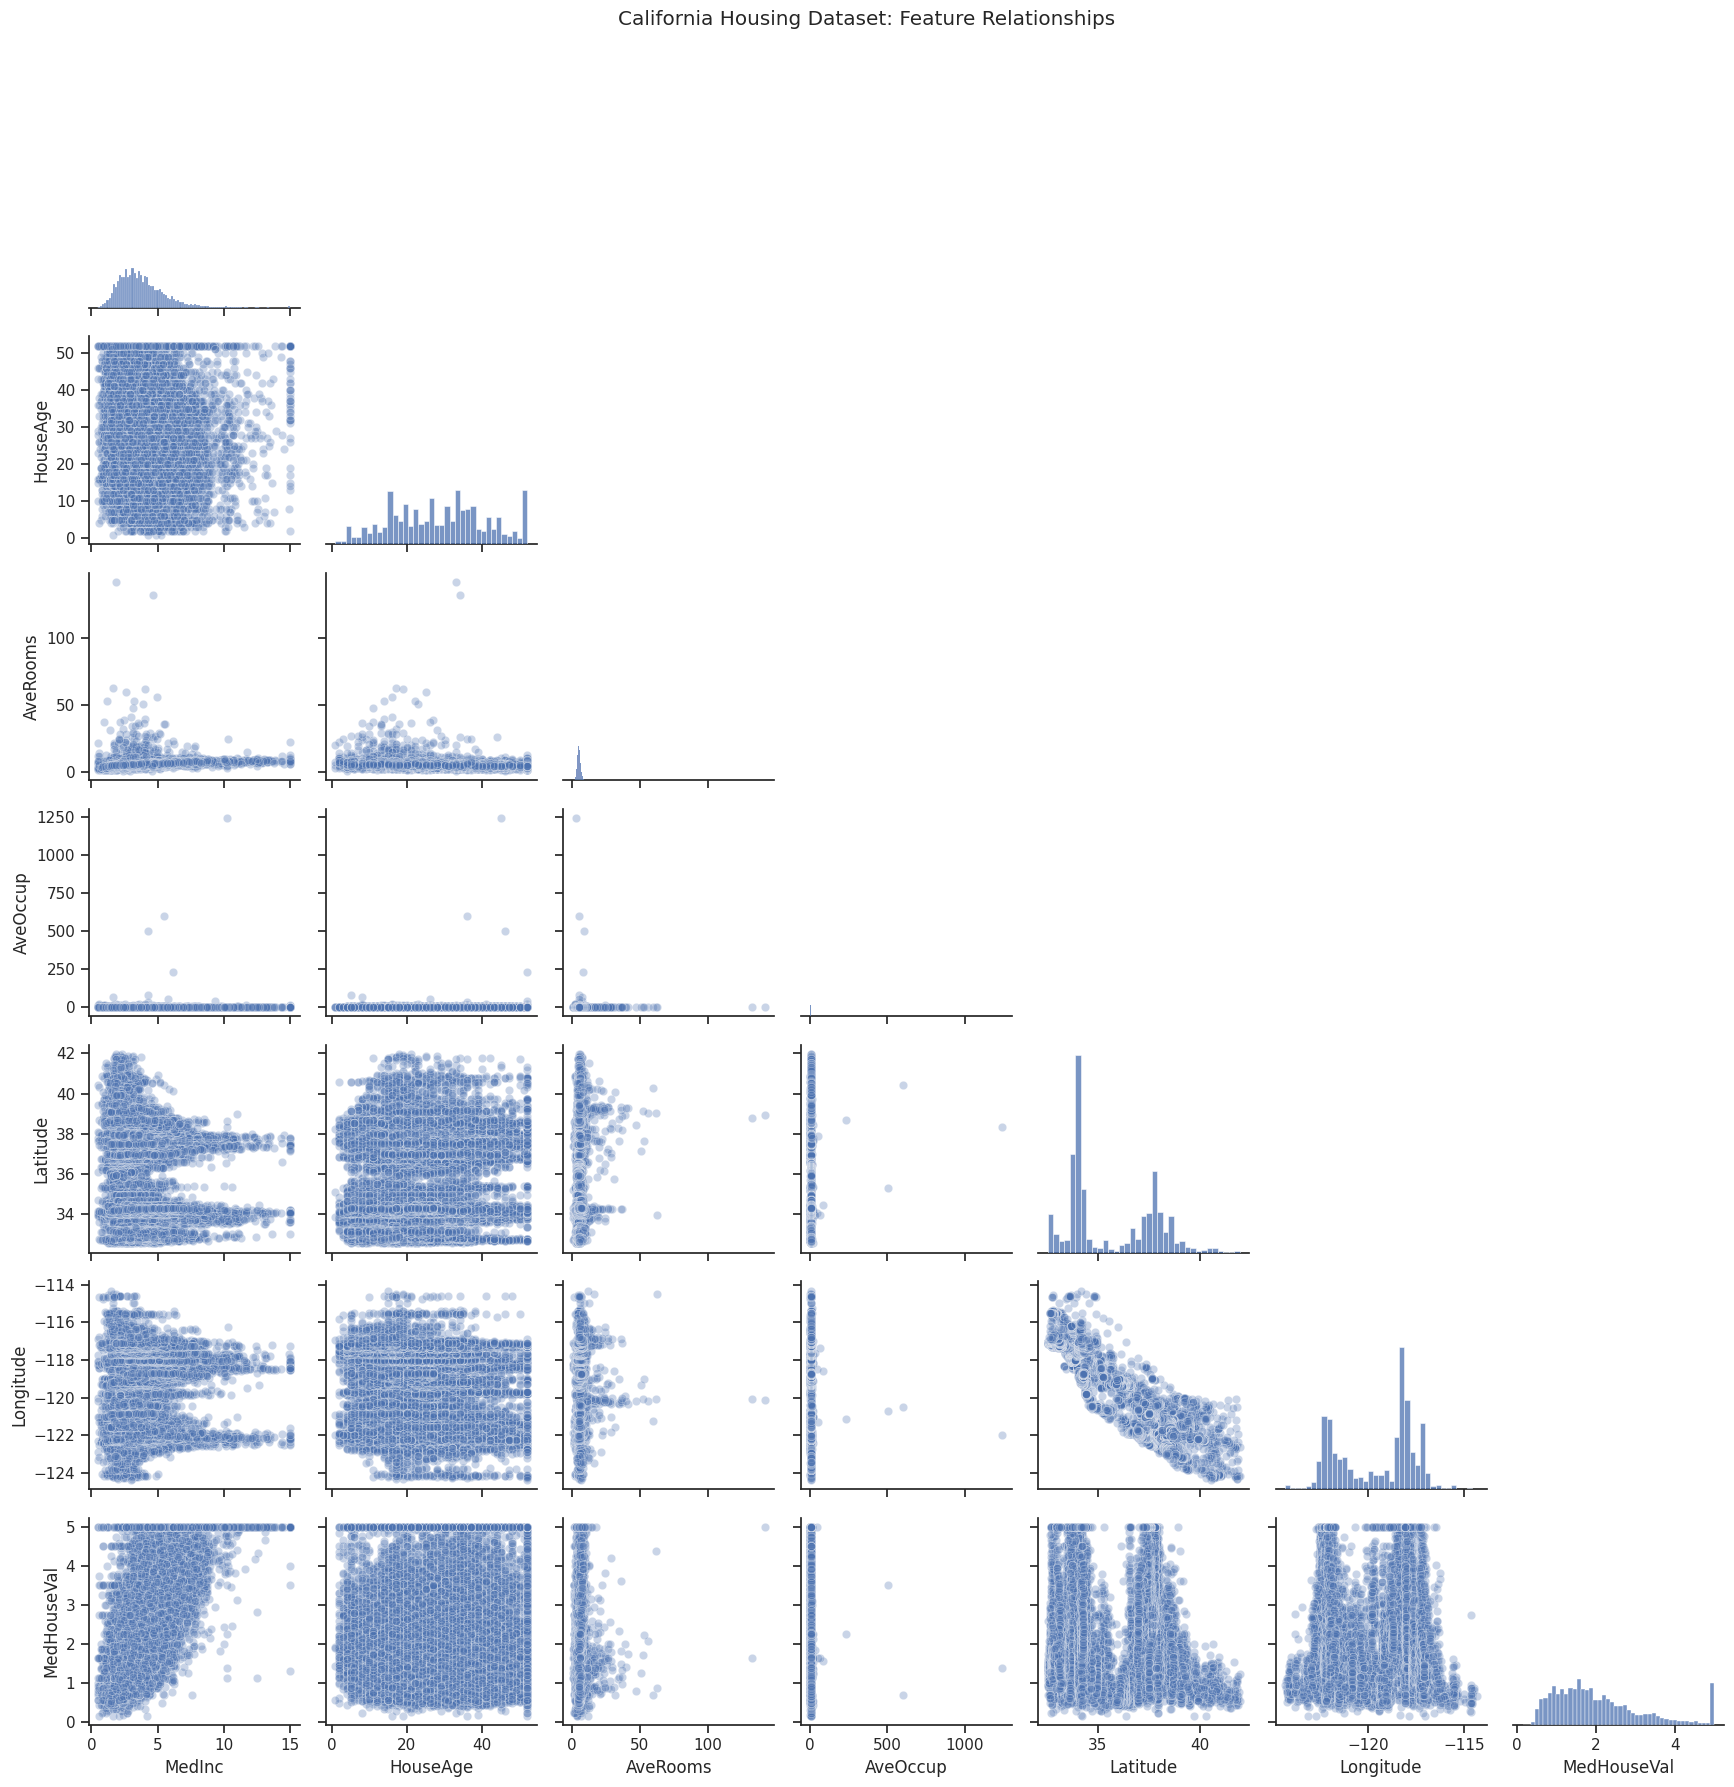

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Select features to visualize
selected_features = [
    'MedInc', 'HouseAge', 'AveRooms', 'AveOccup',
    'Latitude', 'Longitude', 'MedHouseVal'
]

# Plot pairplot
sns.set(style="ticks", color_codes=True)
pairplot = sns.pairplot(df[selected_features], corner=True, plot_kws={'alpha': 0.3})
pairplot.fig.suptitle("California Housing Dataset: Feature Relationships", y=1.02)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Load and split the California Housing data
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
baseline_preds = lr.predict(X_test)
r2_lr = r2_score(y_test, baseline_preds)

# Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict outputs from trained NN
f_train = model.predict(X_train).flatten()
nn_preds_test = model.predict(X_test).flatten()
r2_nn = r2_score(y_test, nn_preds_test)

# Mimic model (linear regression trained to mimic NN)
lr_mimic = LinearRegression()
lr_mimic.fit(X_train, f_train)
mimic_preds = lr_mimic.predict(X_test)

# Score
mimic_r2_vs_y = r2_score(y_test, mimic_preds)       # Usefulness vs real target

# Display
print(f"Baseline Linear R² (vs y): {r2_lr:.4f}")
print(f"Neural Net R² (vs y): {r2_nn:.4f}")
print(f"Mimic R² (vs y): {mimic_r2_vs_y:.4f}")
print(f"λ(f): {r2_score(nn_preds_test, mimic_preds):.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Baseline Linear R² (vs y): 0.5758
Neural Net R² (vs y): 0.7905
Mimic R² (vs y): 0.5638
λ(f): 0.7127


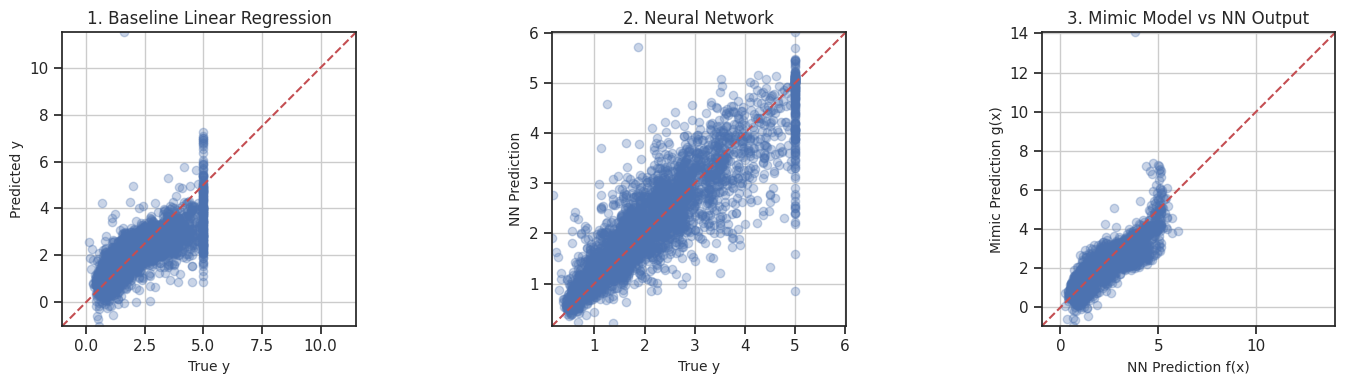

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# === Clean, styled plotting ===
def add_styled_subplot(ax, x, y, title, xlabel, ylabel):
    ax.scatter(x, y, alpha=0.3)
    min_val = min(np.min(x), np.min(y))
    max_val = max(np.max(x), np.max(y))
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label="Ideal Fit")
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.grid(True)

# === Main Plot ===
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

add_styled_subplot(axs[0], y_test, baseline_preds, "1. Baseline Linear Regression", "True y", "Predicted y")
add_styled_subplot(axs[1], y_test, nn_preds_test, "2. Neural Network", "True y", "NN Prediction")
add_styled_subplot(axs[2], nn_preds_test, mimic_preds, "3. Mimic Model vs NN Output", "NN Prediction f(x)", "Mimic Prediction g(x)")

plt.tight_layout()
plt.show()